In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [198]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv", parse_dates=['Tanggal'], date_format='%d/%m/%Y')

In [199]:
print(data)

         Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0       1/1/2017   04:58:14   -8.9300   110.0500              10        4.0   
1       1/2/2017   21:02:24   -8.9400   108.7500              10        5.3   
2       1/3/2017   03:52:37   -8.3900   110.6900              10        3.1   
3       1/4/2017   00:44:38   -9.2700   113.4800              10        3.4   
4       1/5/2017   20:07:56   -9.8100   111.7500              10        3.2   
...          ...        ...       ...        ...             ...        ...   
2177  12/27/2022   00:38:27   -7.8601   110.5298              13        1.3   
2178  12/28/2022   02:19:49   -8.8718   112.4565              44        3.2   
2179  12/29/2022   00:33:56   -9.0316   112.1481              10        3.2   
2180  12/30/2022   00:02:38  -10.2996   113.2803              10        3.6   
2181  12/31/2022   01:02:38  -10.2996   113.2803              10        3.6   

     Type                                         K

In [200]:
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [201]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [202]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [203]:
gempa_semua = np.array(gempa_semua)

In [204]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -8.94   108.75    10.    ]
 [ -8.39   110.69    10.    ]
 ...
 [ -9.0316 112.1481  10.    ]
 [-10.2996 113.2803  10.    ]
 [-10.2996 113.2803  10.    ]]


In [205]:
magnitude = magnitude.astype('float64')
longitude = longitude.astype('float64')
latitude = latitude.astype('float64')

In [206]:
magnitude.dtype

dtype('float64')

In [207]:
longitude.dtype

dtype('float64')

In [208]:
latitude.dtype

dtype('float64')

In [209]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.3, random_state=42)

In [210]:
X_valid, X_training, y_valid, y_training = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [211]:
print(X_valid)

[[ -9.67      112.9        10.       ]
 [ -7.1       107.4757765  12.       ]
 [ -8.92684   109.96698    10.       ]
 ...
 [ -8.41525   111.00233    75.       ]
 [ -9.2558    113.3856     28.       ]
 [ -8.91      113.65       10.       ]]


In [212]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(192, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 256)               1024      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 192)               49344     
                                                                 
 dense_58 (Dense)            (None, 128)               24704     
                                                                 
 dense_59 (Dense)            (None, 48)                6192      
                                                                 
 dense_60 (Dense)            (None, 32)                1568      
                                                                 
 dense_61 (Dense)            (None, 16)               

In [213]:
optimizer = Adam(learning_rate=0.001)

In [214]:
model.compile(optimizer=optimizer, loss='mse')

In [215]:
history = model.fit(X_training, y_training, batch_size=64, epochs=3000, verbose=1, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/3000
1/5 [=====>........................] - ETA: 1s - loss: 9.6221


Epoch 1: val_loss improved from inf to 2.78353, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
5/5 [==============================] - 1s 47ms/step - loss: 6.4207 - val_loss: 2.7835
Epoch 2/3000
1/5 [=====>........................] - ETA: 0s - loss: 2.9316
Epoch 2: val_loss improved from 2.78353 to 2.43361, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
5/5 [==============================] - 0s 23ms/step - loss: 2.6990 - val_loss: 2.4336
Epoch 3/3000
1/5 [=====>........................] - ETA: 0s - loss: 2.3725
Epoch 3: val_loss improved from 2.43361 to 2.08219, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
5/5 [==============================] - 0s 20ms/step - loss: 1.9879 - val_loss: 2.0822
Epoch 4/3000
1/5 [=====>........................] - ETA: 0s - loss: 1.7231
Epoch 4: val_loss improved from 2.08219 to 1.87039, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\che

In [216]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5")
error = model.evaluate(X_valid, y_valid)
error_percentage = error
print("Loss: ", error_percentage)

39/39 [==============================] - 0s 869us/step - loss: 0.4110
Loss:  0.41097718477249146


data X_test yang harus dimasukkan dibagian input user

latitude_subset = latitude[:100]
longitude_subset = longitude[:100]
kedalaman_subset = kedalaman[:100]

In [217]:
count = 0  # Variable to count the number of predicted data
predictions = np.array([])  # Array to store the predicted values

for test in X_test:
    koordinat_latitude = float(test[0])
    koordinat_longitude = float(test[1])
    kedalaman_gempa = float(test[2])

    input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
    hasil_prediksi = model.predict(input_data)

    # Concatenate the predicted value to the predictions array
    predictions = np.concatenate([predictions, hasil_prediksi.flatten()])

    # Increase the count by 1
    count += 1

    # Print the prediction
    print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

    if count == 365:
        break

print("Banyaknya data yang diprediksi:", count)


1/1 [==============================] - 0s 74ms/step
Perkiraan kekuatan gempa [[3.916201]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[3.1868105]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.2124953]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[2.9336042]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[3.0364256]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[3.2508478]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[0.0183669]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[2.0951524]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.1073523]] Mg
1/1 [==============================] - 0s 19ms/step
Perkiraan kekuatan gempa [[3.500814]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan 

count = 0  # Variable to count the number of predicted data
predictions = []  # List to store the predicted values

for i in range(len(latitude_subset)):
    for j in range(len(longitude_subset)):
        for k in range(len(kedalaman_subset)):
            koordinat_latitude = float(latitude_subset[i])
            koordinat_longitude = float(longitude_subset[j])
            kedalaman_gempa = float(kedalaman_subset[k])

            input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
            hasil_prediksi = model.predict(input_data)

            # Append the predicted value to the list
            predictions.append(hasil_prediksi)

            # Increase the count by 1
            count += 1

            # Print the prediction
            print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

            if count == 100:
                break
        else:
            continue
        break
    else:
        continue
    break

# Convert the list of predictions to a NumPy array
predictions = np.array(predictions)

print("Banyaknya data yang diprediksi:", count)


In [218]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [219]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {} Mg".format(prediksi_gempa))

In [220]:
print(predictions)

[ 3.91620111e+00  3.18681049e+00  3.21249533e+00  2.93360424e+00
  3.03642559e+00  3.25084782e+00  1.83669031e-02  2.09515238e+00
  3.10735226e+00  3.50081396e+00  3.30932283e+00  3.08375311e+00
  3.12595892e+00  3.26072502e+00 -1.15519762e-03  3.28894806e+00
  3.36316729e+00  3.09300280e+00  3.06462049e+00  3.42896748e+00
  3.07718325e+00  2.43873596e-02  3.23869562e+00  2.96881771e+00
  3.86931467e+00  2.91392422e+00  3.04824162e+00 -7.59893656e-03
  3.47501659e+00  3.45257759e+00  2.47929096e-02  3.75723505e+00
  3.14561987e+00  6.45291805e-03  2.54571438e-03  3.18744183e+00
  3.38633013e+00  3.39234543e+00  3.30269194e+00  3.14787006e+00
  2.88446856e+00  2.95493364e+00 -1.00514531e-01  1.55246258e-02
  3.06029749e+00  2.86034060e+00  1.00013614e-02  1.53889060e-02
  3.27459669e+00  2.74137557e-02  3.22334766e+00  3.30860758e+00
  3.44948769e+00  3.44337130e+00  3.18726730e+00  3.08177853e+00
  3.48465919e+00  1.64070618e+00  3.15522099e+00  3.95936441e+00
  2.88104486e+00  3.44495

In [221]:
flattened_array = predictions

In [222]:
magnitude_subset = magnitude[:365]

In [223]:
x = data['Tanggal'][:365]
y_data_asli = magnitude_subset
y_data_forecasted = flattened_array

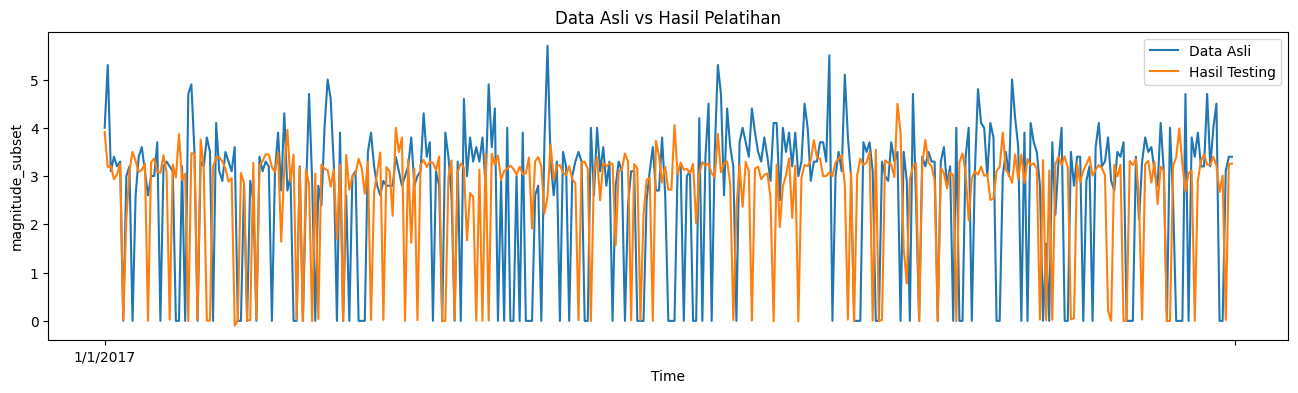

In [224]:
plt.figure(figsize=(16, 4))
plt.plot(x, y_data_asli, label='Data Asli')
plt.plot(x, y_data_forecasted, label='Hasil Testing')
plt.xlabel('Time')
plt.ylabel('magnitude_subset')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.legend()
plt.show()

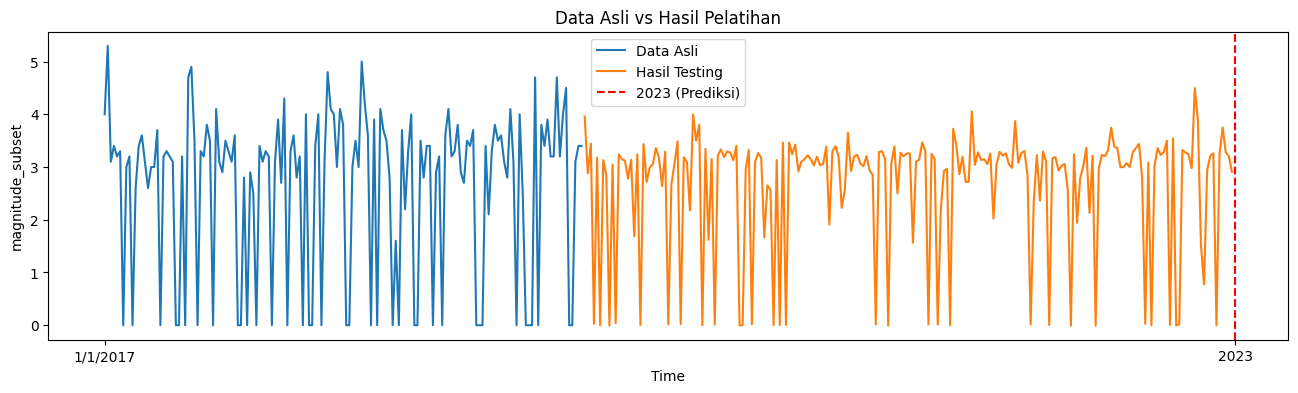

In [238]:
# Set the x-axis range for the plot
x_data_asli = x[x <= '2022']
x_data_forecasted = x[x >= '2023']

# Create the plot
plt.figure(figsize=(16, 4))
plt.plot(x_data_asli, y_data_asli[x <= '2022'], label='Data Asli')
plt.plot(x_data_forecasted, y_data_forecasted[x >= '2023'], label='Hasil Testing')
plt.xlabel('Time')
plt.ylabel('magnitude_subset')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.legend()
plt.show()


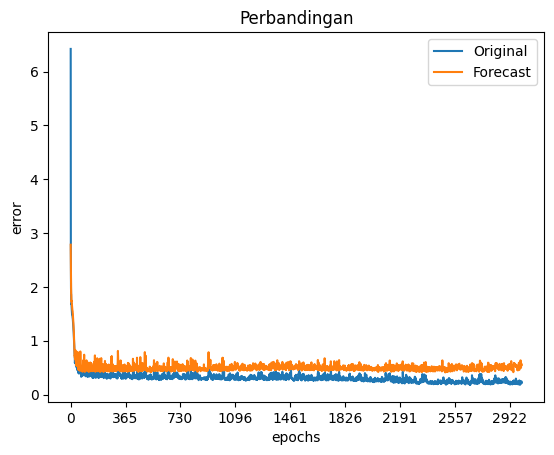

In [226]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Perbandingan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(['Original', 'Forecast'], loc='upper right')
plt.show()